In [89]:
import os
import json
import csv

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [90]:
# settings

fs = 17  # fontsize
FIGURE_PATH = './figures'

# plt.rcParams['font.family'] = ['serif']

In [91]:
# process people
def process_people():
    # load all json files in the folder
    folder = './data_user_study'
    files = os.listdir(folder)
    files = [f for f in files if f.endswith('.json')]
    files.sort()

    # load all json files
    data = []
    for f in files:
        filepath = os.path.join(folder, f)
        with open(filepath, 'r') as file:
            d = json.load(file)
            data.append(d)

    # process persons
    persons = []
    headers = ['pid', 'order', 'name', 'gender', 'age', 'email', 'title', 'major',
               'familiar_with_vis', 'familiar_with_db', 'familiar_with_qo']
    for d in data:
        persons.append([
            d['person']['pid'],
            d['person']['order'],
            d['person']['name'],
            d['person']['gender'],
            d['person']['age'],
            d['person']['email'],
            d['person']['level'],
            d['person']['major'],
            d['person']['familiarWithVIS'],
            d['person']['familiarWithDB'],
            d['person']['familiarWithQO']
        ])

    # gender, # and percentages
    gender_cnt = {}
    for p in persons:
        gender = p[3]
        gender_cnt.setdefault(gender, 0)
        gender_cnt[gender] += 1
    gender_percents = {}
    for gender, cnt in gender_cnt.items():
        gender_percents[gender] = cnt / len(persons)

    # avg of people age
    ages = [p[4] for p in persons]
    avg_age = sum(ages) / len(ages)

    # std of people age
    std_age = np.std(ages)

    # min, max of people age
    min_age = min(ages)
    max_age = max(ages)

    # print
    print('Gender: ', ', '.join([f'{k}: {v}' for k, v in gender_cnt.items()]))
    print('Gender percentage: ', ', '.join([f'{k}: {v:.2%}' for k, v in gender_percents.items()]))
    print('Min age:', min_age)
    print('Max age:', max_age)
    print('Average age:', avg_age)
    print('Std of age:', std_age)
    print('Avg years for db:', sum([max(p[4] - 20, 0) for p in persons]) / len(persons))
    print('# familiar with db:', sum([p[9] for p in persons]))

    # save to csv
    # with open('./persons.csv', 'w', newline='') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(headers)
    #     writer.writerows(persons)

process_people()

Gender:  Male: 20, Female: 3
Gender percentage:  Male: 86.96%, Female: 13.04%
Min age: 19
Max age: 31
Average age: 23.608695652173914
Std of age: 2.839766224836162
Avg years for db: 3.652173913043478
# familiar with db: 11


In [92]:
# avg of people


In [93]:
# load all json files in the folder
folder = './data_user_study'
files = os.listdir(folder)
files = [f for f in files if f.endswith('.json')]
files.sort()

# load all json files
raw_data = []
for f in files:
    filepath = os.path.join(folder, f)
    with open(filepath, 'r') as file:
        d = json.load(file)
        raw_data.append(d)

data = []
headers = ['pid', 'task', 'case', 'method', 'time', 'attempt', 'confidence']
for d in raw_data:
    pid = d['person']['pid']
    for a in d['answers']:
        task = a['task']
        case_name = a['caseName']
        method = a['method']
        if not a['timeList']:
            print(f'No timeList: {pid}, {task}, {case_name}, {method}')
            continue
        # time_cost = a['timeList'][0] / 1000      # in seconds
        time_cost = (a['endTime'] - a['startTime']) / 1000      # in seconds
        attempt = a['answerCount']
        confidence = a['confidenceList'][-1] if a['confidenceList'] else 3
        data.append([
            pid, task, case_name, method, time_cost, attempt, confidence,
        ])

data

No timeList: 7, 2, bug1-0, nm


[[5, 1, 'bug4-0', 'nm', 1134.628, 2, 4],
 [5, 1, 'ssb-q1', 'qv', 188.216, 1, 4],
 [5, 1, 'bug1-0', 'qvm', 654.84, 3, 4],
 [5, 1, 'ssb-q11', 'nm', 641.364, 2, 3],
 [5, 1, 'bug0-0', 'qv', 454.326, 2, 5],
 [5, 1, 'bug4-1', 'qvm', 175.292, 1, 3],
 [5, 2, 'bug4-0', 'nm', 163.931, 1, 5],
 [5, 2, 'bug1-0', 'qvm', 332.711, 2, 5],
 [5, 2, 'bug0-0', 'qv', 218.45, 3, 5],
 [12, 1, 'bug4-0', 'nm', 1497.45, 3, 3],
 [12, 1, 'ssb-q1', 'qvm', 437.377, 1, 3],
 [12, 1, 'bug1-0', 'qv', 689.101, 4, 1],
 [12, 1, 'ssb-q11', 'nm', 342.235, 3, 3],
 [12, 1, 'bug0-0', 'qvm', 180.949, 1, 5],
 [12, 1, 'bug4-1', 'qv', 193.996, 4, 5],
 [12, 2, 'bug4-0', 'nm', 196.327, 2, 1],
 [12, 2, 'bug1-0', 'qv', 221.516, 3, 1],
 [12, 2, 'bug0-0', 'qvm', 130.706, 2, 5],
 [13, 1, 'bug4-0', 'qv', 608.807, 1, 4],
 [13, 1, 'ssb-q1', 'qvm', 744.608, 2, 3],
 [13, 1, 'bug1-0', 'nm', 757.641, 1, 5],
 [13, 1, 'ssb-q11', 'qv', 740.522, 2, 4],
 [13, 1, 'bug0-0', 'qvm', 184.17, 1, 4],
 [13, 1, 'bug4-1', 'nm', 295.62, 3, 2],
 [13, 2, 'bug4-0'

In [94]:
# clean data

data = [r for r in data if r[4] > 0]        # time > 0

# find [4, 1, 'bug4-0', 'qvm', ...] and -30min
for r in data:
    if r[0] == 4 and r[1] == 1 and r[2] == 'bug4-0' and r[3] == 'qvm':
        r[4] = round(r[4] - 40 * 60, 3)

# filter out 1 confidence
# data = [r for r in data if r[6] > 1]

# only T1
# data = [r for r in data if r[1] == 1]

# only T2
# data = [r for r in data if r[1] == 2]

data

[[5, 1, 'bug4-0', 'nm', 1134.628, 2, 4],
 [5, 1, 'ssb-q1', 'qv', 188.216, 1, 4],
 [5, 1, 'bug1-0', 'qvm', 654.84, 3, 4],
 [5, 1, 'ssb-q11', 'nm', 641.364, 2, 3],
 [5, 1, 'bug0-0', 'qv', 454.326, 2, 5],
 [5, 1, 'bug4-1', 'qvm', 175.292, 1, 3],
 [5, 2, 'bug4-0', 'nm', 163.931, 1, 5],
 [5, 2, 'bug1-0', 'qvm', 332.711, 2, 5],
 [5, 2, 'bug0-0', 'qv', 218.45, 3, 5],
 [12, 1, 'bug4-0', 'nm', 1497.45, 3, 3],
 [12, 1, 'ssb-q1', 'qvm', 437.377, 1, 3],
 [12, 1, 'bug1-0', 'qv', 689.101, 4, 1],
 [12, 1, 'ssb-q11', 'nm', 342.235, 3, 3],
 [12, 1, 'bug0-0', 'qvm', 180.949, 1, 5],
 [12, 1, 'bug4-1', 'qv', 193.996, 4, 5],
 [12, 2, 'bug4-0', 'nm', 196.327, 2, 1],
 [12, 2, 'bug1-0', 'qv', 221.516, 3, 1],
 [12, 2, 'bug0-0', 'qvm', 130.706, 2, 5],
 [13, 1, 'bug4-0', 'qv', 608.807, 1, 4],
 [13, 1, 'ssb-q1', 'qvm', 744.608, 2, 3],
 [13, 1, 'bug1-0', 'nm', 757.641, 1, 5],
 [13, 1, 'ssb-q11', 'qv', 740.522, 2, 4],
 [13, 1, 'bug0-0', 'qvm', 184.17, 1, 4],
 [13, 1, 'bug4-1', 'nm', 295.62, 3, 2],
 [13, 2, 'bug4-0'

In [95]:
# stat per person
data_stat_person = []
headers = ['pid', 'q_id', 'task', 'method',
           'median_time', 'avg_time',
           'correct_cnt', 'error_cnt', 'attempt_cnt', 'error_rate',
           'avg_confidence']
for pid in list(set([r[0] for r in data])):
    for task in [1, 2]:
        for method in ['nm', 'qvm', 'qv']:
            pre_person_method = [r for r in data if r[0] == pid and r[1] == task and r[3] == method]

            if not pre_person_method:
                continue

            # time
            times = [r[4] for r in pre_person_method]
            median_time = sorted(times)[len(times) // 2]
            avg_time = sum(times) / len(times)

            # correct, error, attempt
            # each item is one people
            correct_cnt = len(pre_person_method)
            attempt_cnt = sum([r[5] for r in pre_person_method])
            error_cnt = attempt_cnt - correct_cnt
            error_rate = error_cnt / attempt_cnt

            # confidence
            confidences = [r[6] for r in pre_person_method]
            avg_confidence = sum(confidences) / len(confidences)

            data_stat_person.append([
                pid, f'{task}-{pid}', task, method,
                median_time, avg_time,
                correct_cnt, error_cnt, attempt_cnt, error_rate,
                avg_confidence
            ])

In [96]:
# stat per question
data_stat = []
headers = ['q_id', 'task', 'case', 'method',
           'median_time', 'avg_time',
           'correct_cnt', 'error_cnt', 'attempt_cnt', 'error_rate',
           'avg_confidence']
# collect cases
cases = list(set([r[2] for r in data]))
for task in [1, 2]:
    for c in cases:
        # task + case = one question
        q_id = f'{task}-{c}'
        for method in ['nm', 'qvm', 'qv']:
            pre_question_method = [r for r in data if r[1] == task and r[2] == c and r[3] == method]

            if not pre_question_method:
                continue

            # time
            times = [r[4] for r in pre_question_method]
            median_time = sorted(times)[len(times) // 2]
            mean_time = sum(times) / len(times)
            time_measurement = median_time
            # time_measurement = mean_time
            avg_time = sum(times) / len(times)

            # correct, error, attempt
            # each item is one people
            correct_cnt = len(pre_question_method)
            attempt_cnt = sum([r[5] for r in pre_question_method])
            error_cnt = attempt_cnt - correct_cnt
            error_rate = error_cnt / attempt_cnt

            # correct_cnt = sum([r[5] == 1 for r in pre_question_method])
            # total_cnt = len(pre_question_method)
            # error_cnt = total_cnt - correct_cnt
            # error_rate = error_cnt / total_cnt
            # attempt_cnt = sum([r[5] for r in pre_question_method])

            # confidence
            confidences = [r[6] for r in pre_question_method]
            avg_confidence = sum(confidences) / len(confidences)

            data_stat.append([
                q_id, task, c, method,
                time_measurement,
                avg_time,
                correct_cnt, error_cnt, 0, error_rate,
                avg_confidence
            ])

data_stat

[['1-bug0-0',
  1,
  'bug0-0',
  'nm',
  405.392,
  467.119375,
  8,
  5,
  0,
  0.38461538461538464,
  2.75],
 ['1-bug0-0',
  1,
  'bug0-0',
  'qvm',
  203.602,
  303.9965555555556,
  9,
  2,
  0,
  0.18181818181818182,
  3.888888888888889],
 ['1-bug0-0',
  1,
  'bug0-0',
  'qv',
  306.444,
  315.54783333333336,
  6,
  4,
  0,
  0.4,
  4.333333333333333],
 ['1-bug1-0',
  1,
  'bug1-0',
  'nm',
  757.641,
  757.8915000000001,
  6,
  3,
  0,
  0.3333333333333333,
  3.0],
 ['1-bug1-0',
  1,
  'bug1-0',
  'qvm',
  910.592,
  801.001125,
  8,
  10,
  0,
  0.5555555555555556,
  3.5],
 ['1-bug1-0',
  1,
  'bug1-0',
  'qv',
  480.924,
  619.7603333333333,
  9,
  9,
  0,
  0.5,
  2.4444444444444446],
 ['1-ssb-q1',
  1,
  'ssb-q1',
  'nm',
  848.94,
  744.328,
  8,
  6,
  0,
  0.42857142857142855,
  2.75],
 ['1-ssb-q1',
  1,
  'ssb-q1',
  'qvm',
  488.828,
  532.16175,
  8,
  7,
  0,
  0.4666666666666667,
  2.75],
 ['1-ssb-q1',
  1,
  'ssb-q1',
  'qv',
  488.217,
  478.705,
  7,
  0,
  0,
  0.0

In [97]:
# stat the confidence distribution
data_stat_confidence: dict[str, list] = {}      # method 2 confidence list 1-5

for d in data:
    method = d[3]
    confidence = d[6]
    data_stat_confidence.setdefault(method, [0] * 5)
    data_stat_confidence[method][confidence - 1] += 1

data_stat_confidence

{'nm': [17, 14, 24, 5, 8], 'qv': [8, 9, 18, 11, 23], 'qvm': [5, 10, 23, 6, 25]}

In [98]:
# difference per question
data_stat_diff = []
headers = ['q_id', 'task', 'case', 'x-nm',
           'median_time_diff', 'avg_time_diff',
           'error_rate_diff',
           'avg_confidence_diff']
for task in [1, 2]:
    for c in cases:
        # task + case = one question
        q_id = f'{task}-{c}'
        data_nm = [r for r in data_stat if r[0] == q_id and r[3] == 'nm']
        if not data_nm:
            continue
        assert len(data_nm) == 1
        nm_item = data_nm[0]

        for method in ['qvm', 'qv']:
            data_x = [r for r in data_stat if r[0] == q_id and r[3] == method]
            assert len(data_x) == 1
            x_item = data_x[0]
            data_stat_diff.append([
                q_id, task, c, method,
                x_item[4] - nm_item[4], x_item[5] - nm_item[5],
                x_item[9] - nm_item[9],
                x_item[10] - nm_item[10]
            ])

data_stat_diff

[['1-bug0-0',
  1,
  'bug0-0',
  'qvm',
  -201.79,
  -163.12281944444442,
  -0.2027972027972028,
  1.1388888888888888],
 ['1-bug0-0',
  1,
  'bug0-0',
  'qv',
  -98.94799999999998,
  -151.57154166666663,
  0.015384615384615385,
  1.583333333333333],
 ['1-bug1-0',
  1,
  'bug1-0',
  'qvm',
  152.95100000000002,
  43.10962499999994,
  0.22222222222222227,
  0.5],
 ['1-bug1-0',
  1,
  'bug1-0',
  'qv',
  -276.717,
  -138.1311666666668,
  0.16666666666666669,
  -0.5555555555555554],
 ['1-ssb-q1',
  1,
  'ssb-q1',
  'qvm',
  -360.1120000000001,
  -212.16625,
  0.038095238095238126,
  0.0],
 ['1-ssb-q1',
  1,
  'ssb-q1',
  'qv',
  -360.72300000000007,
  -265.623,
  -0.42857142857142855,
  0.6785714285714284],
 ['1-ssb-q11',
  1,
  'ssb-q11',
  'qvm',
  -208.50800000000004,
  -180.1933214285715,
  -0.13636363636363635,
  1.1428571428571428],
 ['1-ssb-q11',
  1,
  'ssb-q11',
  'qv',
  -270.81000000000006,
  -220.52212500000002,
  -0.2272727272727273,
  1.625],
 ['1-bug4-0',
  1,
  'bug4-0',
  

In [99]:
# test normality
def test_normality(data, alpha = 0.05):
    stat, p = stats.shapiro(data)
    if p > alpha:
        return p, True      # accept null hypothesis, normal distribution
    else:
        return p, False     # reject null hypothesis, not normal distribution

# test one-tailed Wilcoxon signed-rank
def test_wilcoxon(data1, data2, alpha = 0.05, alternative = 'two-sided'):
    res = stats.wilcoxon(data1, data2, correction=True, alternative=alternative)
    if res.pvalue > alpha:
        return res.pvalue, False        # accept null hypothesis, there is no difference
    else:
        return res.pvalue, True         # reject null hypothesis, there is a difference

# test levene
def test_levene(data1, data2, alpha = 0.05):
    res = stats.levene(data1, data2)
    p = res.pvalue
    if p > alpha:
        return p, True      # accept null hypothesis, equal variance
    else:
        return p, False     # reject null hypothesis, not equal variance

# Student's t-test
def test_ttest(data1, data2, alpha = 0.05, alternative = 'two-sided'):
    _, equal_var = test_levene(data1, data2)
    res = stats.ttest_ind(data1, data2, equal_var=equal_var, alternative=alternative)
    p = res.pvalue
    if p > alpha:
        return p, False     # accept null hypothesis, there is no difference
    else:
        return p, True      # reject null hypothesis, there is a difference

def decrease_rate(x, y):
    return (x - y) / y

In [100]:
median_time_data = [
    # r[4] is median time, r[3] is method
    [r[4] for r in data_stat if r[3] == 'qv'],
    [r[4] for r in data_stat if r[3] == 'qvm'],
    [r[4] for r in data_stat if r[3] == 'nm'],
]
for d in median_time_data:
    print(test_normality(d))

print('Median time QV < NM:',
      test_wilcoxon(median_time_data[0], median_time_data[2], alternative='less'))
print('Median time QVM < NM:',
      test_wilcoxon(median_time_data[1], median_time_data[2], alternative='less'))
p_median_time_qv_nm = test_wilcoxon(median_time_data[0], median_time_data[2], alternative='less')[0]
p_median_time_qvm_nm = test_wilcoxon(median_time_data[1], median_time_data[2], alternative='less')[0]

p_median_time_qv_nm, p_median_time_qvm_nm

(0.056200379587785905, True)
(0.10989897593743866, True)
(0.3255342777788705, True)
Median time QV < NM: (0.005859375, True)
Median time QVM < NM: (0.150390625, False)


(0.005859375, 0.150390625)

In [101]:
mean_error_rate_data = [
    [r[9] for r in data_stat if r[3] == 'qv'],
    [r[9] for r in data_stat if r[3] == 'qvm'],
    [r[9] for r in data_stat if r[3] == 'nm'],
]
for d in mean_error_rate_data:
    print(test_normality(d))

# because the error rate is normal distribution, we can use wilcoxon
# print(test_wilcoxon(mean_error_rate_data[0], mean_error_rate_data[2], alternative='less'))
# print(test_wilcoxon(mean_error_rate_data[1], mean_error_rate_data[2], alternative='less'))

# instead of wilcoxon, we can use t-test
print('Mean error rate QV < NM:',
      test_ttest(mean_error_rate_data[0], mean_error_rate_data[2], alternative='less'))
print('Mean error rate QVM < NM:',
      test_ttest(mean_error_rate_data[1], mean_error_rate_data[2], alternative='less'))
p_mean_error_rate_qv_nm = test_ttest(mean_error_rate_data[0], mean_error_rate_data[2], alternative='less')[0]
p_mean_error_rate_qvm_nm = test_ttest(mean_error_rate_data[1], mean_error_rate_data[2], alternative='less')[0]

p_mean_error_rate_qv_nm, p_mean_error_rate_qvm_nm

(0.5712116021073098, True)
(0.20424498209445674, True)
(0.5892321519273711, True)
Mean error rate QV < NM: (0.04502953994327892, True)
Mean error rate QVM < NM: (0.07393452404567015, False)


(0.04502953994327892, 0.07393452404567015)

In [102]:
# compute BCa confidence interval

median_time_intervals = []
for d in median_time_data:
    res = stats.bootstrap((median_time_data[1],),
                    statistic=np.mean,
                    method='bca', confidence_level=0.95)
    lo, hi = res.confidence_interval
    median_time_intervals.append((lo, hi))

median_time_intervals

[(335.878505154709, 661.8081868966133),
 (333.1152222222222, 653.3967342388654),
 (334.839869704747, 662.9623066553114)]

In [103]:
medianprops = dict(linestyle='-', color='k')

# figsize = (6, 4)
figsize = (7, 4)

<>:35: SyntaxWarning: invalid escape sequence '\D'
<>:35: SyntaxWarning: invalid escape sequence '\D'
/var/folders/bb/61yl9pgs6pxf41cplw3p8d4r0000gn/T/ipykernel_58874/1903007088.py:35: SyntaxWarning: invalid escape sequence '\D'
  axs[1].set_title('Median $\Delta$time v.s. $LogSol$ per task (sec)', fontsize=fs, weight='bold')


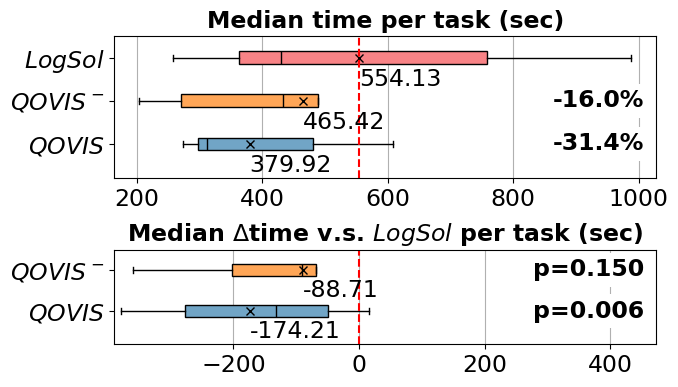

In [104]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=figsize, gridspec_kw={'height_ratios': [6, 4]})

fig.set_facecolor('white')
for ax in axs:
    ax.set_facecolor('white')

bar_width = 0.3

labels0 = ['$QOVIS$', '$QOVIS^-$', '$LogSol$']
boxplot_data0 = [
    # r[4] is median time, r[3] is method
    [r[4] for r in data_stat if r[3] == 'qv'],
    [r[4] for r in data_stat if r[3] == 'qvm'],
    [r[4] for r in data_stat if r[3] == 'nm'],
]
means0 = [np.mean(d) for d in boxplot_data0]
boxplot0 = axs[0].boxplot(boxplot_data0, labels=labels0, vert=False, widths=bar_width, showfliers=False, patch_artist=True, medianprops=medianprops)
axs[0].set_title('Median time per task (sec)', fontsize=fs, weight='bold')
axs[0].plot(means0, range(1, len(means0) + 1), 'x', color='black')     # reverse xy as vert
# draw a vertical line at the median value at each box
# for i, item in enumerate(boxplot0['medians']):
#     # get position data for median line
#     x0, y0 = item.get_xydata()[1] # top of median line
#     x1, y1 = item.get_xydata()[0] # bottom of median line
#     axs[0].plot([x0, x1], [y0, y1], 'k-', color='black')

labels1 = ['$QOVIS$', '$QOVIS^-$']
boxplot_data1 = [
    # r[4] is median time diff, r[3] is method
    [r[4] for r in data_stat_diff if r[3] == 'qv'],
    [r[4] for r in data_stat_diff if r[3] == 'qvm'],
]
means1 = [np.mean(d) for d in boxplot_data1]
boxplot1 = axs[1].boxplot(boxplot_data1, labels=labels1, vert=False, widths=bar_width, showfliers=False, patch_artist=True, medianprops=medianprops)
axs[1].set_title('Median $\Delta$time v.s. $LogSol$ per task (sec)', fontsize=fs, weight='bold')
axs[1].plot(means1, range(1, len(means1) + 1), 'x', color='black')     # reverse xy as vert

# add a vertical line at the mean of the median time of $NM$
axs[0].axvline(x=means0[2], color='r', linestyle='--')
axs[1].axvline(x=0, color='r', linestyle='--')

axs[0].grid(axis='x', linestyle='-')
axs[1].grid(axis='x', linestyle='-')
axs[0].set_axisbelow(True)
axs[1].set_axisbelow(True)
# set ticks font size
axs[0].tick_params(labelsize=fs)
axs[1].tick_params(labelsize=fs)

# add labels to mean time
y_offset = 0.35
text_fs_rate = 1
for i, txt in enumerate(means0):
    axs[0].annotate(f'{txt:.2f}', (txt, i + y_offset), fontsize=fs*text_fs_rate)
for i, txt in enumerate(means1):
    axs[1].annotate(f'{txt:.2f}', (txt, i + y_offset), fontsize=fs*text_fs_rate)

# Find the overall min and max values across all boxplot data

overall_min = min([y for x in boxplot_data0 for y in x])
overall_max = max([y for x in boxplot_data0 for y in x])

# Set the x-axis limits for both subplots
gap = 40
axs[0].set_xlim([overall_min - gap, overall_max + gap])
align_point = means0[2] # nm mean median time
axs[1].set_xlim([overall_min - gap - align_point, overall_max + gap - align_point])

# Set y-axis limits
y_lim_offset = -0.3
y_lim = axs[0].get_ylim()
axs[0].set_ylim([y_lim[0] + y_lim_offset, y_lim[1]])
y_lim = axs[1].get_ylim()
axs[1].set_ylim([y_lim[0] + y_lim_offset, y_lim[1]])

# add decrease rate to the right of QV and QVM
qvm_dec = decrease_rate(means0[1], means0[2])
qv_dec = decrease_rate(means0[0], means0[2])
right0 = axs[0].get_xlim()[1]
axs[0].text(right0 - 20, 0.85, f'{qv_dec:.1%}', fontsize=fs, ha='right', weight='bold', bbox=dict(facecolor='white', edgecolor='none'))
axs[0].text(right0 - 20, 1.85, f'{qvm_dec:.1%}', fontsize=fs, ha='right', weight='bold', bbox=dict(facecolor='white', edgecolor='none'))
# add p-value
right1 = axs[1].get_xlim()[1]
axs[1].text(right1 - 20, 0.85, f'p={p_median_time_qv_nm:.3f}', fontsize=fs, ha='right', weight='bold', bbox=dict(facecolor='white', edgecolor='none'))
axs[1].text(right1 - 20, 1.85, f'p={p_median_time_qvm_nm:.3f}', fontsize=fs, ha='right', weight='bold', bbox=dict(facecolor='white', edgecolor='none'))

colors = ['#71A5C6', '#FFA657', '#F88386']
for bplot in (boxplot0, boxplot1):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

fig.subplots_adjust(hspace=0.6)

# save figure
plt.savefig(os.path.join(FIGURE_PATH, 'median_time.pdf'), bbox_inches='tight', pad_inches=0.01)

plt.show()

<>:29: SyntaxWarning: invalid escape sequence '\D'
<>:29: SyntaxWarning: invalid escape sequence '\D'
/var/folders/bb/61yl9pgs6pxf41cplw3p8d4r0000gn/T/ipykernel_58874/280416588.py:29: SyntaxWarning: invalid escape sequence '\D'
  axs[1].set_title('Mean $\Delta$error v.s. $LogSol$ per task', fontweight=2, fontsize=fs, weight='bold')


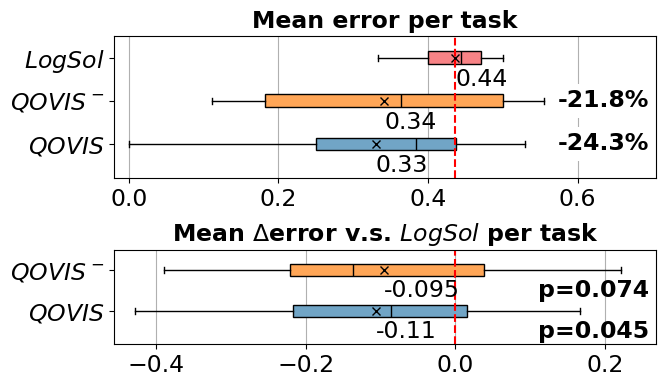

In [105]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=figsize, gridspec_kw={'height_ratios': [6, 4]})

fig.set_facecolor('white')
for ax in axs:
    ax.set_facecolor('white')

bar_width = 0.3

labels0 = ['$QOVIS$', '$QOVIS^-$', '$LogSol$']
boxplot_data0 = [
    # r[9] is mean error rate, r[3] is method
    [r[9] for r in data_stat if r[3] == 'qv'],
    [r[9] for r in data_stat if r[3] == 'qvm'],
    [r[9] for r in data_stat if r[3] == 'nm'],
]
means0 = [np.mean(d) for d in boxplot_data0]
boxplot0 = axs[0].boxplot(boxplot_data0, labels=labels0, vert=False, widths=bar_width, showfliers=False, patch_artist=True, medianprops=medianprops)
axs[0].set_title('Mean error per task', fontsize=fs, weight='bold')
axs[0].plot(means0, range(1, len(means0) + 1), 'x', color='black')     # reverse xy as vert

labels1 = ['$QOVIS$', '$QOVIS^-$']
boxplot_data1 = [
    # r[6] is mean error rate, r[3] is method
    [r[6] for r in data_stat_diff if r[3] == 'qv'],
    [r[6] for r in data_stat_diff if r[3] == 'qvm'],
]
means1 = [np.mean(d) for d in boxplot_data1]
boxplot1 = axs[1].boxplot(boxplot_data1, labels=labels1, vert=False, widths=bar_width, showfliers=False, patch_artist=True, medianprops=medianprops)
axs[1].set_title('Mean $\Delta$error v.s. $LogSol$ per task', fontweight=2, fontsize=fs, weight='bold')
axs[1].plot(means1, range(1, len(means1) + 1), 'x', color='black')     # reverse xy as vert

axs[0].axvline(x=means0[2], color='r', linestyle='--')
axs[1].axvline(x=0, color='r', linestyle='--')

axs[0].grid(axis='x', linestyle='-')
axs[1].grid(axis='x', linestyle='-')
axs[0].set_axisbelow(True)
axs[1].set_axisbelow(True)
# set ticks font size
axs[0].tick_params(labelsize=fs)
axs[1].tick_params(labelsize=fs)

# add labels to mean error rate
y_offset = 0.35
text_fs_rate = 1
for i, txt in enumerate(means0):
    axs[0].annotate(f'{txt:.2}', (txt, i + y_offset), fontsize=fs*text_fs_rate)
for i, txt in enumerate(means1):
    axs[1].annotate(f'{txt:.2}', (txt, i + y_offset), fontsize=fs*text_fs_rate)

# Find the overall min and max values across all boxplot data
overall_min = min([y for x in boxplot_data0 for y in x])
overall_max = max([y for x in boxplot_data0 for y in x])

# Set the x-axis limits for both subplots
gap = 0.15
axs[0].set_xlim([overall_min - 0.02, overall_max + gap])
align_point = means0[2] # nm mean median time
axs[1].set_xlim([overall_min - 0.02 - align_point, overall_max + gap - align_point])

# Set y-axis limits
y_lim_offset = -0.3
y_lim = axs[0].get_ylim()
axs[0].set_ylim([y_lim[0] + y_lim_offset, y_lim[1]])
y_lim = axs[1].get_ylim()
axs[1].set_ylim([y_lim[0] + y_lim_offset, y_lim[1]])

# add decrease rate to the right of QV and QVM
qvm_dec = decrease_rate(means0[1], means0[2])
qv_dec = decrease_rate(means0[0], means0[2])
right0 = axs[0].get_xlim()[1]
axs[0].text(right0 - 0.01, 0.85, f'{qv_dec:.1%}', fontsize=fs, ha='right', weight='bold', bbox=dict(facecolor='white', edgecolor='none'))
axs[0].text(right0 - 0.01, 1.85, f'{qvm_dec:.1%}', fontsize=fs, ha='right', weight='bold', bbox=dict(facecolor='white', edgecolor='none'))
# add p-value
right1 = axs[1].get_xlim()[1]
axs[1].text(right1 - 0.01, 0 + y_offset, f'p={p_mean_error_rate_qv_nm:.3f}', fontsize=fs, ha='right', weight='bold', bbox=dict(facecolor='none', edgecolor='none'))
axs[1].text(right1 - 0.01, 1 + y_offset, f'p={p_mean_error_rate_qvm_nm:.3f}', fontsize=fs, ha='right', weight='bold', bbox=dict(facecolor='none', edgecolor='none'))

colors = ['#71A5C6', '#FFA657', '#F88386']
for bplot in (boxplot0, boxplot1):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

fig.subplots_adjust(hspace=0.6)

# save figure
plt.savefig(os.path.join(FIGURE_PATH, 'mean_error.pdf'), bbox_inches='tight', pad_inches=0.01)

plt.show()

<>:29: SyntaxWarning: invalid escape sequence '\D'
<>:29: SyntaxWarning: invalid escape sequence '\D'
/var/folders/bb/61yl9pgs6pxf41cplw3p8d4r0000gn/T/ipykernel_58874/2127381091.py:29: SyntaxWarning: invalid escape sequence '\D'
  axs[1].set_title('Mean $\Delta$confidence v.s. $LogSol$ per task', fontsize=fs, weight='bold')


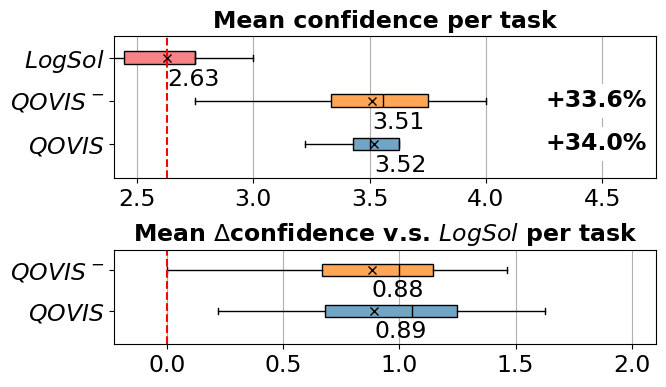

In [106]:
# confidence
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=figsize, gridspec_kw={'height_ratios': [6, 4]})
fig.set_facecolor('white')
for ax in axs:
    ax.set_facecolor('white')

bar_width = 0.3

labels0 = ['$QOVIS$', '$QOVIS^-$', '$LogSol$']
boxplot_data0 = [
    # r[10] is mean confidence, r[3] is method
    [r[10] for r in data_stat if r[3] == 'qv'],
    [r[10] for r in data_stat if r[3] == 'qvm'],
    [r[10] for r in data_stat if r[3] == 'nm'],
]
means0 = [np.mean(d) for d in boxplot_data0]
boxplot0 = axs[0].boxplot(boxplot_data0, labels=labels0, vert=False, widths=bar_width, showfliers=False, patch_artist=True, medianprops=medianprops)
axs[0].set_title('Mean confidence per task', fontsize=fs, weight='bold')
axs[0].plot(means0, range(1, len(means0) + 1), 'x', color='black')     # reverse xy as vert

labels1 = ['$QOVIS$', '$QOVIS^-$']
boxplot_data1 = [
    # r[7] is mean confidence, r[3] is method
    [r[7] for r in data_stat_diff if r[3] == 'qv'],
    [r[7] for r in data_stat_diff if r[3] == 'qvm'],
]
means1 = [np.mean(d) for d in boxplot_data1]
boxplot1 = axs[1].boxplot(boxplot_data1, labels=labels1, vert=False, widths=bar_width, showfliers=False, patch_artist=True, medianprops=medianprops)
axs[1].set_title('Mean $\Delta$confidence v.s. $LogSol$ per task', fontsize=fs, weight='bold')
axs[1].plot(means1, range(1, len(means1) + 1), 'x', color='black')     # reverse xy as vert

axs[0].axvline(x=means0[2], color='r', linestyle='--')
axs[1].axvline(x=0, color='r', linestyle='--')

axs[0].grid(axis='x', linestyle='-')
axs[1].grid(axis='x', linestyle='-')
axs[0].set_axisbelow(True)
axs[1].set_axisbelow(True)
# set ticks font size
axs[0].tick_params(labelsize=fs)
axs[1].tick_params(labelsize=fs)

# add labels to mean confidence
y_offset = 0.35
text_fs_rate = 1
for i, txt in enumerate(means0):
    axs[0].annotate(f'{txt:.2f}', (txt, i + y_offset), fontsize=fs*text_fs_rate)
for i, txt in enumerate(means1):
    axs[1].annotate(f'{txt:.2f}', (txt, i + y_offset), fontsize=fs*text_fs_rate)

# Find the overall min and max values across all boxplot data
overall_min = min([y for x in boxplot_data0 for y in x])
overall_max = max([y for x in boxplot_data0 for y in x])

# Set the x-axis limits for both subplots
left_gap = -0.4
right_gap = 0.4
axs[0].set_xlim([overall_min - left_gap, overall_max + right_gap])
align_point = means0[2] # nm mean median time
axs[1].set_xlim([overall_min - left_gap - align_point, overall_max + right_gap - align_point])

# Set y-axis limits
y_lim_offset = -0.3
y_lim = axs[0].get_ylim()
axs[0].set_ylim([y_lim[0] + y_lim_offset, y_lim[1]])
y_lim = axs[1].get_ylim()
axs[1].set_ylim([y_lim[0] + y_lim_offset, y_lim[1]])

# add increase rate to the right of QV and QVM
qvm_inc = decrease_rate(means0[1], means0[2])
qv_inc = decrease_rate(means0[0], means0[2])
right0 = axs[0].get_xlim()[1]
axs[0].text(right0 - 0.04, 0.85, f'+{qv_inc:.1%}', fontsize=fs, ha='right', weight='bold', bbox=dict(facecolor='white', edgecolor='none'))
axs[0].text(right0 - 0.04, 1.85, f'+{qvm_inc:.1%}', fontsize=fs, ha='right', weight='bold', bbox=dict(facecolor='white', edgecolor='none'))

colors = ['#71A5C6', '#FFA657', '#F88386']
for bplot in (boxplot0, boxplot1):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

fig.subplots_adjust(hspace=0.6)

# save figure
plt.savefig(os.path.join(FIGURE_PATH, 'mean_confidence.pdf'), bbox_inches='tight', pad_inches=0.01)

plt.show()

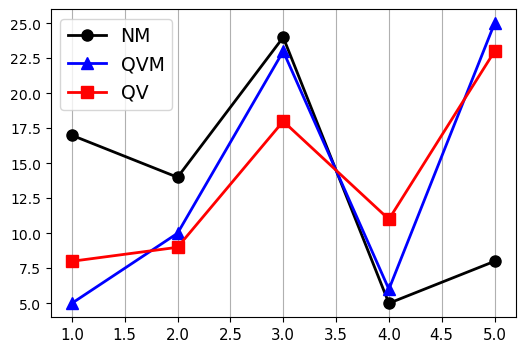

In [107]:
# Confidence distribution: data_stat_confidence
# use a smooth line chart

color_dict = {
    'nm': 'black',
    'qvm': 'blue',
    'qv': 'red',
}

symbol_dict = {
    'nm': 'o',
    'qvm': '^',
    'qv': 's',
}

fig, ax = plt.subplots(figsize=(6, 4))

fig.set_facecolor('white')
ax.set_facecolor('white')

# set x ticks font size
ax.tick_params(axis='x', labelsize=fs*0.64)
# add x grid
ax.grid(axis='x', linestyle='-')
ax.set_axisbelow(True)

# area chart
# where x is 1-5 confidence level, and y is the number of people
x = range(1, 6)
for method in ['qv', 'qvm', 'nm'][::-1]:
    y = data_stat_confidence[method]
    ax.plot(x, y, color=color_dict[method], marker=symbol_dict[method], markersize=8, label=method.upper(), linewidth=2)

# add legend
ax.legend(fontsize=fs*0.8, loc='upper left')

# save figure
plt.savefig(os.path.join(FIGURE_PATH, 'confidence_distribution.pdf'), bbox_inches='tight')

plt.show()

In [108]:
# QV vs NM time difference each person
data_stat_diff_person = []
headers = ['pid', 'x-nm',
           'avg_time_diff',
           'error_rate_diff',
           'avg_confidence_diff']
for pid in list(set([r[0] for r in data])):
    pre_person = [r for r in data_stat_person if r[0] == pid]
    if not pre_person:
        continue

    data_nm = [r for r in pre_person if r[3] == 'nm']
    if not data_nm:
        continue

    for method in ['qv', 'qvm']:
        data_x = [r for r in pre_person if r[3] == method]
        if not data_x:
            continue
        # compute the mean difference
        data_stat_diff_person.append([
            pid, method,
            np.mean([r[4] for r in data_x]) - np.mean([r[4] for r in data_nm]), # time
            np.mean([r[9] for r in data_x]) - np.mean([r[9] for r in data_nm]), # error rate
            np.mean([r[10] for r in data_x]) - np.mean([r[10] for r in data_nm]) # confidence
        ])

# how many people fast with qv than nm
data_stat_diff_person_qv = [r for r in data_stat_diff_person if r[1] == 'qv']
fast_qv = [r for r in data_stat_diff_person_qv if r[2] < 0]
fast_qv_rate = len(fast_qv) / len(data_stat_diff_person_qv)

# mean
diff_person_qv_mean = np.mean([r[2] for r in data_stat_diff_person_qv])
# median
diff_person_qv_median = np.median([r[2] for r in data_stat_diff_person_qv])

# data_stat_diff_person

<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
/var/folders/bb/61yl9pgs6pxf41cplw3p8d4r0000gn/T/ipykernel_58874/1327234239.py:26: SyntaxWarning: invalid escape sequence '\D'
  ax.text(diff_person_qv_mean - 30, 10, f'Mean $\Delta$: {diff_person_qv_mean:.1f}s', color='g', fontsize=fs, ha='right', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))
/var/folders/bb/61yl9pgs6pxf41cplw3p8d4r0000gn/T/ipykernel_58874/1327234239.py:27: SyntaxWarning: invalid escape sequence '\D'
  ax.text(diff_person_qv_mean - 30, 8, f'Median $\Delta$: {diff_person_qv_median:.1f}s', color='b', fontsize=fs, ha='right', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))


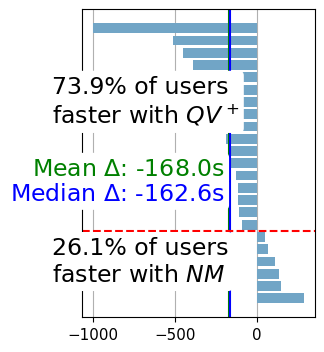

In [109]:
# one figure for QV time difference
fig, ax = plt.subplots(figsize=(3, 4))

fig.set_facecolor('white')
ax.set_facecolor('white')

# no y-axis
ax.yaxis.set_visible(False)
# set x ticks font size
ax.tick_params(axis='x', labelsize=fs*0.64)
# add x grid
ax.grid(axis='x', linestyle='-')
ax.set_axisbelow(True)

bar_width = 0.8

time_diff_person_data = [r[2] for r in data_stat_diff_person_qv]
# sort
time_diff_person_data.sort(reverse=True)
# bar chart
ax.barh(range(len(time_diff_person_data)), time_diff_person_data, bar_width, color='#71A5C6')

# add mean and median (line + text), add text background color
ax.axvline(x=diff_person_qv_mean, color='g', linestyle='-')
ax.axvline(x=diff_person_qv_median, color='b', linestyle='-')
ax.text(diff_person_qv_mean - 30, 10, f'Mean $\Delta$: {diff_person_qv_mean:.1f}s', color='g', fontsize=fs, ha='right', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))
ax.text(diff_person_qv_mean - 30, 8, f'Median $\Delta$: {diff_person_qv_median:.1f}s', color='b', fontsize=fs, ha='right', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

# add a line when QV is faster than NM
ax.axhline(y=len(time_diff_person_data) * (1 - fast_qv_rate) - 0.5, color='r', linestyle='--')

# ?% of users
# faster with QV
ax.text(-1250, 16, f'{fast_qv_rate:.1%} of users\nfaster with $QV^+$', fontsize=fs, ha='left', va='center', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))
# ?% of users
# faster with NM
ax.text(-1250, 3, f'{1 - fast_qv_rate:.1%} of users\nfaster with $NM$', fontsize=fs, ha='left', va='center', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

# save figure
plt.savefig(os.path.join(FIGURE_PATH, 'time_diff_person_qv.pdf'), bbox_inches='tight')

plt.show()